In [1]:
import numpy as np
import pandas as pd

import datetime 
import statsmodels as sm

import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
pop = pd.read_csv('../data/uspop.csv')
pop.head(10)

,date,uspop
0,1790,3.93
1,1800,5.31
2,1810,7.24
3,1820,9.64
4,1830,12.90
5,1840,17.10
6,1850,23.20
7,1860,31.40
8,1870,39.80
9,1880,50.20


In [3]:
pop.shape

(19, 2)

In [4]:
pop.dtypes

date       int64
uspop    float64
dtype: object

In [5]:
pop['uspop'] = pd.to_numeric(pop['uspop'], errors='coerce')
pop['date'] = pd.to_datetime(pop['date'], format="%Y").dt.date

In [6]:
pop

,date,uspop
0,1790-01-01,3.93
1,1800-01-01,5.31
2,1810-01-01,7.24
3,1820-01-01,9.64
4,1830-01-01,12.90
5,1840-01-01,17.10
6,1850-01-01,23.20
7,1860-01-01,31.40
8,1870-01-01,39.80
9,1880-01-01,50.20


In [7]:
pop.dropna(inplace=True)

In [8]:
pop.set_index('date', inplace=True)

In [9]:
print(pop)

             uspop
date              
1790-01-01    3.93
1800-01-01    5.31
1810-01-01    7.24
1820-01-01    9.64
1830-01-01   12.90
1840-01-01   17.10
1850-01-01   23.20
1860-01-01   31.40
1870-01-01   39.80
1880-01-01   50.20
1890-01-01   62.90
1900-01-01   76.00
1910-01-01   92.00
1920-01-01  105.70
1930-01-01  122.80
1940-01-01  131.70
1950-01-01  151.30
1960-01-01  179.30
1970-01-01  203.20


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'US Population')]

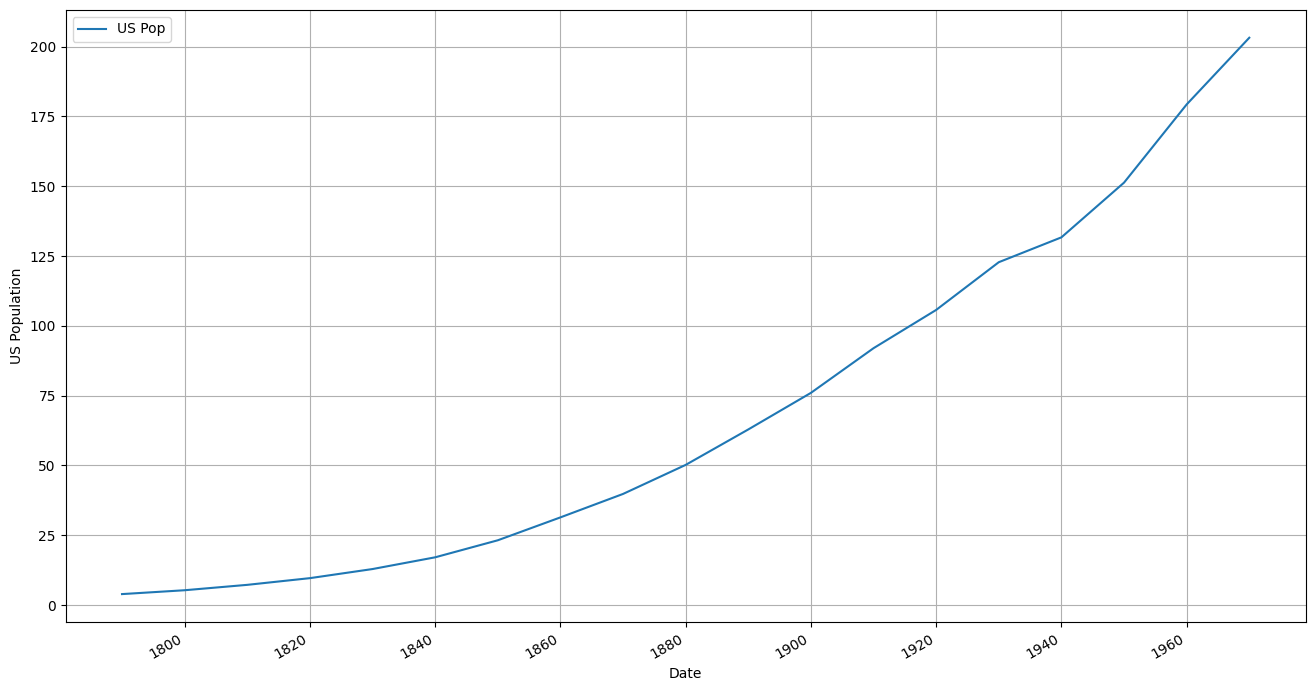

In [10]:
fig, ax = plt.subplots(figsize=(16, 9))
fig.autofmt_xdate()
ax.plot(pop.uspop, label='US Pop', color='tab:blue')
ax.legend()
ax.grid()
ax.set(xlabel='Date',ylabel='US Population')

In [11]:
# pop["dluspop"] = np.log(pop.uspop) - np.log(pop.uspop.shift(1))
# print(pop)
# pop["dluspop"].plot(figsize=(16, 9))
# fig, ax = plt.subplots(figsize=(16, 9))
# fig.autofmt_xdate()
# ax.plot(dlog, label='Log(US Pop)', color='tab:blue')
# ax.legend()
# ax.grid()
# ax.set(xlabel='Date',ylabel='US Population')

In [12]:
pop["prev"] = pop["uspop"].shift(1)
print(pop)

             uspop    prev
date                      
1790-01-01    3.93     NaN
1800-01-01    5.31    3.93
1810-01-01    7.24    5.31
1820-01-01    9.64    7.24
1830-01-01   12.90    9.64
1840-01-01   17.10   12.90
1850-01-01   23.20   17.10
1860-01-01   31.40   23.20
1870-01-01   39.80   31.40
1880-01-01   50.20   39.80
1890-01-01   62.90   50.20
1900-01-01   76.00   62.90
1910-01-01   92.00   76.00
1920-01-01  105.70   92.00
1930-01-01  122.80  105.70
1940-01-01  131.70  122.80
1950-01-01  151.30  131.70
1960-01-01  179.30  151.30
1970-01-01  203.20  179.30


In [13]:
pop = pop.dropna()
print(pop)

             uspop    prev
date                      
1800-01-01    5.31    3.93
1810-01-01    7.24    5.31
1820-01-01    9.64    7.24
1830-01-01   12.90    9.64
1840-01-01   17.10   12.90
1850-01-01   23.20   17.10
1860-01-01   31.40   23.20
1870-01-01   39.80   31.40
1880-01-01   50.20   39.80
1890-01-01   62.90   50.20
1900-01-01   76.00   62.90
1910-01-01   92.00   76.00
1920-01-01  105.70   92.00
1930-01-01  122.80  105.70
1940-01-01  131.70  122.80
1950-01-01  151.30  131.70
1960-01-01  179.30  151.30
1970-01-01  203.20  179.30


In [14]:
train = pop.iloc[:10]
test  = pop.iloc[10:]
print(train)
print(test)
print(train.columns)

            uspop   prev
date                    
1800-01-01   5.31   3.93
1810-01-01   7.24   5.31
1820-01-01   9.64   7.24
1830-01-01  12.90   9.64
1840-01-01  17.10  12.90
1850-01-01  23.20  17.10
1860-01-01  31.40  23.20
1870-01-01  39.80  31.40
1880-01-01  50.20  39.80
1890-01-01  62.90  50.20
            uspop   prev
date                    
1900-01-01   76.0   62.9
1910-01-01   92.0   76.0
1920-01-01  105.7   92.0
1930-01-01  122.8  105.7
1940-01-01  131.7  122.8
1950-01-01  151.3  131.7
1960-01-01  179.3  151.3
1970-01-01  203.2  179.3
Index(['uspop', 'prev'], dtype='object')


In [15]:
train_x = train.loc[:,~train.columns.isin(["date","uspop"])]
train_y = train["uspop"]
print(train_x)
print(train_y)


             prev
date             
1800-01-01   3.93
1810-01-01   5.31
1820-01-01   7.24
1830-01-01   9.64
1840-01-01  12.90
1850-01-01  17.10
1860-01-01  23.20
1870-01-01  31.40
1880-01-01  39.80
1890-01-01  50.20
date
1800-01-01     5.31
1810-01-01     7.24
1820-01-01     9.64
1830-01-01    12.90
1840-01-01    17.10
1850-01-01    23.20
1860-01-01    31.40
1870-01-01    39.80
1880-01-01    50.20
1890-01-01    62.90
Name: uspop, dtype: float64


In [16]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

rf  = RandomForestRegressor(n_estimators=100, random_state=1, oob_score=True)
fit = rf.fit(train_x, train_y)

In [17]:
from sklearn.metrics import mean_squared_error, r2_score

def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

# Access the OOB Score
oob_score = fit.oob_score_
print(f'Out-of-Bag Score: {oob_score}')

# Making predictions on the same data or new data
predictions = fit.predict(train_x)

# Evaluating the model
mse = mean_squared_error(train_y, predictions)
rmse = rmse(train_y, predictions)
print(f'Mean Squared Error: {mse}')
print(f'RMSE: {rmse}')

r2 = r2_score(train_y, predictions)
print(f'R-squared: {r2}')

Out-of-Bag Score: 0.890637479843824
Mean Squared Error: 4.16070711900006
RMSE: 2.0397811448780625
R-squared: 0.9880204116754426


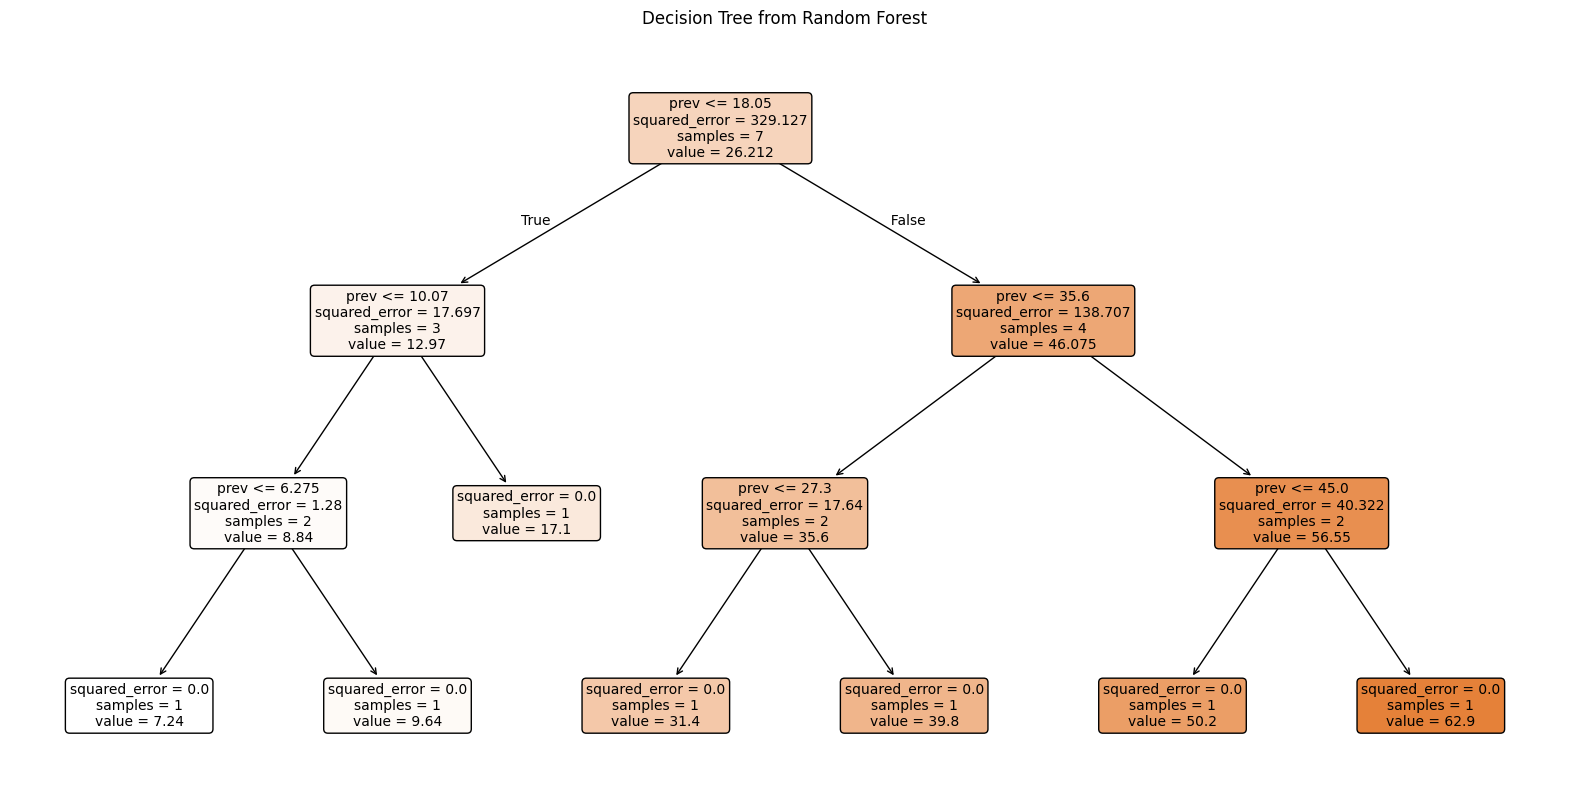

In [18]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming regressor is your trained Random Forest model
# Pick one tree from the forest, e.g., the first tree (index 0)
tree_to_plot = fit.estimators_[0]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=train_x.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

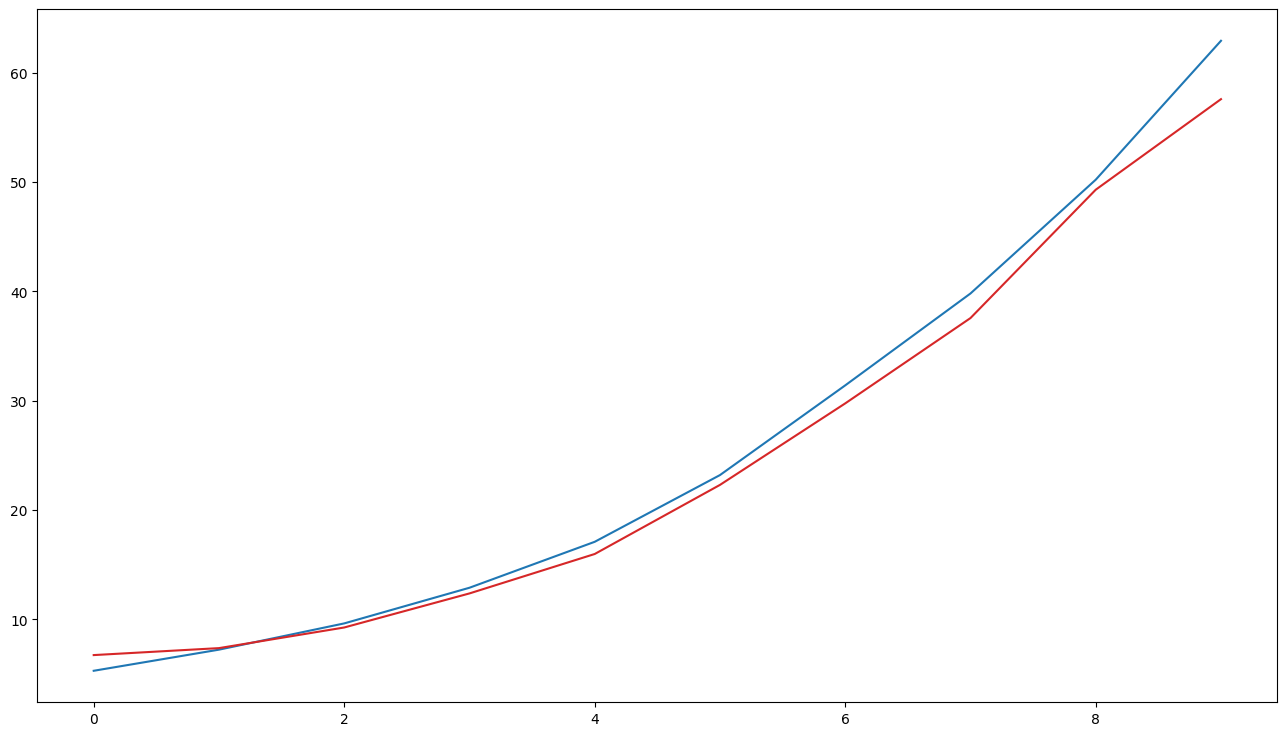

In [19]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(train_y.values, color='tab:blue')
ax.plot(predictions, color='tab:red')

In [20]:
# représenter les prévisions sur le test, identifier et comprendre le problème
test_x = test.loc[:,~test.columns.isin(["date","uspop"])]
test_y = test["uspop"]
test_predict = fit.predict(test_x)
print(test_predict)


[57.564 57.564 57.564 57.564 57.564 57.564 57.564 57.564]
